# 用于语音信号压缩的离散变换

此示例演示了如何使用离散余弦变换(DCT)压缩语音信号。
加载一个包含“强”这个词的文件，这个词是由一个女人和一个男人说的。信号在8 kHz处采样。
利用离散余弦变换对女性语音信号进行压缩。将信号分解为DCT基向量。
分解中的术语和信号中的样本一样多。矢量展开系数X测量每个组件中存储了多少能量。将系数从最大到最小排序。
并且找出多少DCT系数代表99.9%的能量在信号中。将数字表示为总数的百分比。
分解中的术语和信号中的样本一样多。矢量展开系数X测量每个组件中存储了多少能量。将系数从最大到最小排序。

In [2]:
from scipy.io import loadmat
from scipy.fft import dct,idct
import numpy as np
import matplotlib.pyplot as plt

In [3]:
m = loadmat("strong.mat")
x = m['her']
x = x.reshape(-1,1)
X = dct(x,norm='ortho')
X = X.reshape(len(X))
XA = abs(X)
XX = sorted(XA,reverse = True)
ind = sorted(range(len(X)), key = lambda k: XA[k])
need = 1
while np.linalg.norm(X[ind[1:need+1]])/np.linalg.norm(X) < 0.999:
  need = need + 1
xpc = need/len(X)*100
X[ind[need+1:]] = 0
xx = idct(X)

AttributeError: 'AxesSubplot' object has no attribute 'set_legend'

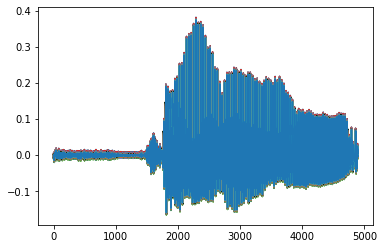

In [4]:
fig,ax = plt.subplots()
ax.plot(x)
ax.plot(xx)
ax.plot(x-xx)
ax.set_legend(["Original","45% of coeffs","Differences"])
#fig.savefig('./program1.png',dpi=500)

重复分析男性的声音。找出多少DCT系数代表99.9%的能量，并表示数字为一个百分比的全部。
将其余的系数设置为零，并从压缩版本重构信号。绘制原始信号，其重构，以及两者之间的区别。

In [ ]:
y = m['him']
y = y.reshape(-1,1)
Y = dct(y,norm = 'ortho')
Y = Y.reshape(len(Y))
YA = abs(Y)
YY = sorted(YA,reverse = True)
ind = sorted(range(len(Y)), key = lambda k: YA[k])
need = 1
while np.linalg.norm(Y[ind[1:need+1]])/np.linalg.norm(Y) < 0.999:
  need = need+1
ypc = need/len(Y)*100
Y[ind[need+1:]] = 0
yy = idct(Y)

fig,ax = plt.subplots()
ax.plot(y)
ax.plot(yy)
ax.plot(y-yy)
ax.legend(["Original","57% of coeffs","Differences"])
fig.savefig('./program2.png',dpi=500)

在这两种情况下，大约一半的DCT系数足以合理地重建语音信号。如果所需能量分数为99%，所需系数的数目将减少到总能量的20%左右。重建的结果是低劣的，但仍然是可理解的。
对这些和其他样本的分析表明，需要更多的系数来表征男人的声音，而不是女人的声音。